In [ ]:
import pandas as pd
import numpy as np
import requests
import json
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import dump, load

In [ ]:
#pip install zipfile36 pandas numpy requests plotly sklearn nlkt

## Scopus UCA data

In [ ]:
df_uca = pd.read_csv("../app/bso_publis_scopus/03_primary/publis_uniques_doi_oa_data.csv", sep=",", encoding='utf8')
df_uca.shape

(14545, 35)

## Harvest ministère dataset

url data.gouv (pour les dumps intégraux et voir les datafields) : https://www.data.gouv.fr/fr/datasets/barometre-de-la-science-ouverte/

url sur la plateforme Open data du MESRI (Opendatasoft) : https://data.enseignementsup-recherche.gouv.fr/explore/dataset/open-access-monitor-france/information/?disjunctive.year=&disjunctive.oa_host_type=&flg=fr

id dataset : open-access-monitor-france

url dump csv https://www.data.gouv.fr/fr/datasets/r/c16f65b7-ca4f-409b-be1e-a1482dc2d22a (réponse vide ?)

url dump json : https://www.data.gouv.fr/fr/datasets/r/c79d4a26-6068-4d2a-8272-4df63e0a421d (réponse vide ?)

Alternative : lien .gz sur https://data.enseignementsup-recherche.gouv.fr/explore/dataset/open-access-monitor-france/information/?disjunctive.year=&disjunctive.oa_host_type=&flg=fr

### API (doc)

#### v2

url racine : https://data.enseignementsup-recherche.gouv.fr/api/v2

Voir les infos sur le dataset : https://data.enseignementsup-recherche.gouv.fr/api/v2/catalog/datasets/open-access-monitor-france

#### v1

url racine : https://data.enseignementsup-recherche.gouv.fr/api/v1

Voir les infos sur le dataset (dans la console opnedatasoft) : https://data.enseignementsup-recherche.gouv.fr/api/v1/console/datasets/1.0/open-access-monitor-france

Console opendatasoft (formulaire web requêtage de l'API) : https://data.enseignementsup-recherche.gouv.fr/api/v1/console/records/1.0/search/?dataset=&q=

Exemple de requête

In [ ]:
resp = requests.get("https://data.enseignementsup-recherche.gouv.fr/api/v2/catalog/datasets/open-access-monitor-france").text
data = json.loads(resp)
data

{'dataset': {'attachments': [],
  'data_visible': True,
  'dataset_id': 'open-access-monitor-france',
  'dataset_uid': 'da_x3n7ki',
  'features': ['analyze'],
  'fields': [{'annotations': {'facet': True},
    'description': "Type d'accès - Année de publication",
    'label': 'oa_host_type_year',
    'name': 'oa_host_type_year',
    'type': 'text'},
   {'annotations': {'facet': True},
    'description': "Type d'accès - Année de publication - Discipline",
    'label': 'oa_host_type_year_scientific_field',
    'name': 'oa_host_type_year_scientific_field',
    'type': 'text'},
   {'annotations': {},
    'description': 'URL doi',
    'label': 'doi_url',
    'name': 'doi_url',
    'type': 'text'},
   {'annotations': {},
    'description': "Type d'accès - Type de document",
    'label': 'oa_host_type_genre',
    'name': 'oa_host_type_genre',
    'type': 'text'},
   {'annotations': {},
    'description': "Type d'accès - Editeur",
    'label': 'oa_host_type_publisher',
    'name': 'oa_host_type

### Dump

In [ ]:
df_bso = pd.read_csv('https://storage.gra.cloud.ovh.net/v1/AUTH_32c5d10cb0fe4519b957064a111717e3/bso_dump/bso-publications-latest.csv.gz',compression='gzip',encoding='utf8').convert_dtypes()
df_bso.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (17,18,19,20,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(1550493, 29)

#### Exploration rapide

In [ ]:
df_bso.columns

Index(['doi', 'year', 'title', 'journal_issns', 'journal_issn_l',
       'journal_name', 'publisher', 'publisher_dissemination', 'hal_id',
       'pmid', 'bso_classification', 'bsso_classification', 'domains', 'lang',
       'genre', 'amount_apc_EUR', 'detected_countries',
       'bso_local_affiliations', 'is_oa', 'journal_is_in_doaj',
       'journal_is_oa', 'observation_date', 'oa_host_type', 'oa_colors',
       'licence_publisher', 'licence_repositories', 'repositories',
       'funding_anr', 'funding_europe'],
      dtype='object')

In [ ]:
df_bso[['bso_local_affiliations','amount_apc_EUR']]

,bso_local_affiliations,amount_apc_EUR
0,<NA>,3675.849542
1,<NA>,<NA>
2,<NA>,<NA>
3,<NA>,2982.914375
4,<NA>,<NA>
...,...,...
1550488,200117305K;180070039;130015506;130026024,<NA>
1550489,200117305K;180089047;180070039;130015506;13002...,2340.6
1550490,200117305K;180070039;130015506,354.0
1550491,200117305K;180089047;180070039;130015506,1735.0


In [ ]:
df_bso["bso_local_affiliations"].value_counts()

europe                                                                                       58498
180036048                                                                                    25826
130026081                                                                                    25486
130026024                                                                                    22568
775685019                                                                                    20841
                                                                                             ...  
193509361;180036048;130026081;196917744;180089013;130018351                                      1
europe;130026149;130015332;ANR                                                                   1
193509361;130015332;180036048;130023385;130026081;180070039;130015506;180089013;130018351        1
europe;130026149;197534860;130026081;180089013;130018351                                         1
193509361;

##### Classification (disciplines)

In [ ]:
df_bso.bso_classification.unique()

<StringArray>
[                            'Medical research',
                              'Biology (fond.)',
         'Computer and \n information sciences',
 'Earth, Ecology, \nEnergy and applied biology',
                              'Social sciences',
                                   'Humanities',
                                  'Engineering',
                 'Physical sciences, Astronomy',
                                  'Mathematics',
                                    'Chemistry',
                                      'unknown']
Length: 11, dtype: string

In [ ]:
px.histogram(df_bso.sort_index(), x='bso_classification')

In [ ]:
df_bso[['bso_classification','bsso_classification','domains']].head(20)

,bso_classification,bsso_classification,domains
0,Medical research,Cardiorespiratory Medicine and Haematology;Pha...,health
1,Medical research,Microbiology,health
2,Biology (fond.),Psychology and Cognitive Sciences,health
3,Medical research,Cardiorespiratory Medicine and Haematology;Pub...,health
4,Medical research,Public Health and Health Services,health
5,Medical research,Clinical Sciences,health
6,Medical research,Engineering,health
7,Medical research,Agricultural and Veterinary Sciences,health
8,Medical research,Psychology and Cognitive Sciences,health
9,Medical research,Public Health and Health Services,health


##### Editeurs

In [ ]:
pd.DataFrame({'group':df_bso["publisher_dissemination"].value_counts().nlargest(20).index, 'count':df_bso["publisher_dissemination"].value_counts().nlargest(20).values})

,group,count
0,Elsevier,380119
1,Springer-Nature,164350
2,Wiley,104842
3,OpenEdition,90300
4,IEEE,79491
5,CAIRN,66679
6,Informa,37079
7,Springer,36162
8,Oxford University Press,36116
9,MDPI,35056


In [ ]:
pd.DataFrame({'group':df_bso["publisher"].value_counts().nlargest(20).index, 'count':df_bso["publisher"].value_counts().nlargest(20).values})

,group,count
0,Elsevier BV,373403
1,Springer Science and Business Media LLC,133305
2,Wiley,93068
3,OpenEdition,63777
4,CAIRN,61953
5,IEEE,60017
6,Springer International Publishing,46270
7,Oxford University Press (OUP),35001
8,MDPI AG,34881
9,Informa UK Limited,34548


##### Date de publication

In [ ]:
df_bso.year.value_counts()

2020    192346
2019    183701
2018    179106
2017    168235
2016    164545
2021    159993
2015    149025
2014    147581
2013    146637
2022     59289
2023        17
2025        13
2024         3
2103         1
2088         1
Name: year, dtype: Int64

##### Type de publication

In [ ]:
df_bso.genre.value_counts()

journal-article    1266248
book-chapter        117724
proceedings         104308
other                37472
preprint             15760
book                  8981
Name: genre, dtype: Int64

##### APC

In [ ]:
df_bso[['bso_local_affiliations','amount_apc_EUR']]

,bso_local_affiliations,amount_apc_EUR
0,<NA>,3675.849542
1,<NA>,<NA>
2,<NA>,<NA>
3,<NA>,2982.914375
4,<NA>,<NA>
...,...,...
1550488,200117305K;180070039;130015506;130026024,<NA>
1550489,200117305K;180089047;180070039;130015506;13002...,2340.6
1550490,200117305K;180070039;130015506,354.0
1550491,200117305K;180089047;180070039;130015506,1735.0


Dump de préparation d'un dataset doi-classification-APC pairs pour un éventuel futur enrichissement du dataset UCA

In [ ]:
df_bso[['doi','year', 'title','bso_classification','amount_apc_EUR']].to_csv("/content/gdrive/MyDrive/Colab Notebooks/opendata_publications_barometre_mesri/export_bso_doi_classification_apc.csv", index=False, encoding='utf8')

#### Affiliation (et num SIREN)

In [ ]:
df_bso["bso_local_affiliations"].isna().value_counts()

True     962970
False    543473
Name: bso_local_affiliations, dtype: int64

In [ ]:
df_bso["bso_local_affiliations"].value_counts()

europe                                                                                                           58313
180036048                                                                                                        26627
130026081                                                                                                        24930
130026024                                                                                                        21556
775685019                                                                                                        20745
                                                                                                                 ...  
130026149;180089047;197534860;180070039;196917744;193113842                                                          1
198608564;192903466;193509361;130026149;180036048;196917744                                                          1
europe;130026149;130026024;775685019;130018351  

Num SIREN UCA : 130025661

In [ ]:
df_bso.loc[df_bso['bso_local_affiliations'].str.contains("130025661", case=True)]

,doi,year,title,journal_issns,journal_issn_l,journal_name,publisher,publisher_dissemination,hal_id,pmid,...,journal_is_in_doaj,journal_is_oa,observation_date,oa_host_type,oa_colors,licence_publisher,licence_repositories,repositories,funding_anr,funding_europe


##### API SIREN (INSEE)

**Se créer un compte**

**Catalogue des API disponibles : https://api.insee.fr/catalogue/**

**Attention : pour utiliser chaque API il faut d'abord y souscrire pour générer un token**

Un token est valable 1 semaine -> pour le régénérer aller dans Mes applications > cliquer sur bso_uca > bouton Regénérer

#### Exemple appel API SIREN par n° siren

https://api.insee.fr/entreprises/sirene/V3/siren/198608564



##### Enrichir les données avec l'API SIREN

In [ ]:
def get_insee_siren_data(siren):
  url = f"https://api.insee.fr/entreprises/sirene/V3/siren/{siren}"
  payload={}
  headers = {
  'Authorization': 'Bearer ####################',
  'Cookie': 'INSEE=138986250.20480.0000; pdapimgateway=2907226890.22560.0000'
    }
  try:
    response = requests.request("GET", url, headers=headers, data=payload)
    return json.loads(response.text)['uniteLegale']['periodesUniteLegale'][0]['denominationUniteLegale']
  except:
    pass

#def parse_bso_affiliations_row(row):
#  if ";" in row['bso_local_affiliations']:


In [ ]:
get_insee_siren_data("198608564")

'UNIVERSITE DE POITIERS'

In [ ]:
#test sur qqs publis UCA
list_uca_doi = df_uca.doi.tolist()
df_siren_test = df_bso[df_bso['doi'].isin(list_uca_doi) & df_bso["bso_local_affiliations"].notna()][["doi","bso_local_affiliations"]].sample(10)

In [ ]:
df_siren_test["insee_denomination"] = df_siren_test.apply (lambda row: ";".join([get_insee_siren_data(i) for i in list(row["bso_local_affiliations"].split(";"))]), axis=1)
df_siren_test

,doi,bso_local_affiliations,insee_denomination
1068953,10.1016/j.scitotenv.2017.10.083,130026149,UNIVERSITE PSL
1336955,10.1038/s41540-021-00172-y,180089047;130026081,INSTITUT NATIONAL DE RECHERCHE EN INFORMATIQUE...
1143050,10.1017/jfm.2020.729,180089013,CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE
1339785,10.1016/j.artint.2017.08.006,180089047,INSTITUT NATIONAL DE RECHERCHE EN INFORMATIQUE...
1254826,10.1123/jab.2016-0104,130026081;196917744,UNIVERSITE GRENOBLE ALPES;UNIVERSITE CLAUDE BE...
1371553,10.1016/j.quascirev.2020.106523,130023385;180089013,SORBONNE UNIVERSITE;CENTRE NATIONAL DE LA RECH...
1293498,10.1016/j.kint.2018.06.015,180036048,INSTITUT NATIONAL DE LA SANTE ET DE LA RECHERC...
1222165,10.4000/eps.7012,198406852,AVIGNON UNIVERSITE
1338966,10.1016/j.neuroimage.2018.06.029,180089047,INSTITUT NATIONAL DE RECHERCHE EN INFORMATIQUE...
1207393,10.5334/dsj-2020-024,130026149;130026024,UNIVERSITE PSL;UNIVERSITE PARIS-SACLAY


Bon... à vérifier tout ça...

#### Dump filtré pour le modèle de classification

In [ ]:
# on ne prend que les publis > 2015 + de type articles + celles n'étant pas classifiées Unknown + celles ayant les champs title/journal_name/publisher/year non vides (variables ensuite retenues pour la transformation NLP)
df_bso_filtered = df_bso[(df_bso["year"] > 2015) & (df_bso["genre"] == 'journal-article') & (df_bso["bso_classification"] != "unknown") & (df_bso['title'].notna()) & (df_bso['journal_name'].notna()) & (df_bso['publisher'].notna()) & (df_bso['year'].notna())][["doi","title","year","journal_name","publisher","bso_classification"]]
df_bso_filtered.shape

(906873, 6)

In [ ]:
df_bso_filtered.to_csv("../app/bso_publis_scopus/05_model_input/bso_mesri_filtered.csv", index=False, encoding='utf8')

## Preparation UCA data

### Publications UCA déjà classifiées

In [ ]:
list_uca_doi = df_uca["doi"].tolist()

In [ ]:
print(f"Part des publis UCA présentes dans le dataset du ministère et pour lesquelles on peut déjà récupérer la bso_classification : {round(len(df_bso[df_bso['doi'].isin(list_uca_doi)]['doi'].tolist()) / df_uca.shape[0] * 100)}%")

Part des publis UCA présentes dans le dataset du ministère et pour lesquelles on peut déjà récupérer la bso_classification : 75%


On prépare un fichier doi-bso_classification sur les seuls doi UCA déjà présents côté mesri, que l'on pourra ensuite merger avec le dataset UCA

In [ ]:
df_uca_mesri_intersection = df_bso[(df_bso['doi'].isin(list_uca_doi)) & (df_bso["bso_classification"] != "unknown")][['doi','bso_classification']]
df_uca_mesri_intersection.shape

(10961, 2)

In [ ]:
df_uca_mesri_intersection.to_csv("/content/gdrive/MyDrive/Machine Learning/opendata_publications_barometre_mesri/doi_uca_classification_part1.csv", index=False, encoding="utf-8")

### Publications restantes pour lesquelles on ne récupère pas la varibale bso_classification

In [ ]:
Ce dataframe sera donc le jeu de données sur lequel on appliquera le modèle de ML choisi

In [ ]:
df_uca_remaining = df_uca[~df_uca['doi'].isin(df_uca_mesri_intersection['doi'].tolist())][['doi','title','year','journal_name']]
df_uca_remaining.shape

(3584, 4)

## Preparation Mesri dataset

Etapes en vrac (mémo)

- train set et test set
- variable cible : bso_classification, variables prédictives : title
- encoder la variable cible
- vérifier la langue
- check unbalanced distribution (according to bso_classification)
- remove punctuation
- remove numbers (int and float)
- stop words
- lower case

https://tvdboom.github.io/ATOM/v4.12/user_guide/nlp/#text-cleaning                      


### Traitement des données : Encodage et NLP

#### [Inutilisé dans un 1er temps] Encoder la variable cible avec la classe LabelBinarizer

Ajout d'une colonne target qui transforme la variable bso_classification en matrice dense sachant que "All classifiers in scikit-learn do multiclass classification out-of-the-box"

Doc : https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets puis https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification

(y compris pour passer d'une matrice sense à une matrice creuse)

#### Encoder la variable cible avec la classe LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
df_bso_filtered['bso_classe_encoded'] = labelencoder.fit_transform(df_bso_filtered['bso_classification'])

In [ ]:
df_bso_filtered.head()

,doi,title,year,journal_name,publisher,bso_classification,bso_classe_encoded
0,10.1001/jama.2016.0278,Association of Admission to Veterans Affairs H...,2016,JAMA,American Medical Association (AMA),Medical research,7
1,10.1016/j.diagmicrobio.2016.04.014,Prospective multicenter surveillance identifie...,2016,Diagnostic Microbiology and Infectious Disease,Elsevier BV,Medical research,7
2,10.1177/0018720816651536,Effects of Epinephrine Auto-Injector Shape and...,2016,Human Factors: The Journal of the Human Factor...,SAGE Publications,Biology (fond.),0
3,10.1016/j.jacc.2016.03.507,Association of Guideline-Based Admission Treat...,2016,Journal of the American College of Cardiology,Elsevier BV,Medical research,7
4,10.1111/1475-6773.12455,"A Randomized, Controlled Trial of a Shared Pan...",2016,Health Services Research,Wiley,Medical research,7


#### Nettoyage NLP

In [ ]:
# libraries
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import bigrams
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Functions
stop_en = set(stopwords.words('english')) 

def toLower(row,col):
    return str.lower(row[f'{col}_s']).strip()

tokenizer = RegexpTokenizer(r'\w+')
def tokenize(row,col):
    return [token for token in tokenizer.tokenize(row[f'{col}_lower_stop_words'].strip()) if ((token != u"") & (len(token)>2))]

lemmatizer = WordNetLemmatizer()
def lemmatize(row,col):
    return [lemmatizer.lemmatize(word) for word in row[f'{col}_lower_stop_words_token']]

def listToString(row,col):
    return " ".join([s for s in row[f'{col}_lower_stop_words_token_lemme']])

def text_process(df,col):
    df[f"{col}_lower"] = df.apply(lambda row: toLower(row,col),axis=1)
    df[f'{col}_lower_stop_words'] = df[f'{col}_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_en)]))
    df[f'{col}_lower_stop_words_token'] = df.apply(lambda row: tokenize(row,col),axis=1)
    df[f'{col}_lower_stop_words_token_lemme'] = df.apply(lambda row: lemmatize(row,col),axis=1)
    df[f'{col}_cleaned'] = df.apply(lambda row: listToString(row,col), axis=1)
    return df

##### Champ title

In [ ]:
#on dégage les nombres
df_bso_filtered["title_s"] = df_bso_filtered["title"].str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
#on applique les fonctions
df_bso_nlp_titre = text_process(df_bso_filtered,"title")

In [ ]:
df_bso_nlp_titre.shape

(906873, 13)

##### Champ journal_name

In [ ]:
df_bso_nlp_titre["journal_name_s"] = df_bso_nlp_titre["journal_name"].str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
df_bso_nlp_journal_name = text_process(df_bso_nlp_titre,"journal_name")

In [ ]:
df_bso_nlp_journal_name.shape

(906873, 19)

##### Champ publisher

In [ ]:
df_bso_nlp_journal_name["publisher_s"] = df_bso_nlp_journal_name["publisher"].str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
df_bso_nlp_publisher = text_process(df_bso_nlp_journal_name,"publisher")

In [ ]:
df_bso_nlp_publisher.shape

(1362198, 25)

##### Sauvegarde

In [ ]:
df_bso_ready = df_bso_nlp_publisher[["bso_classification","bso_classe_encoded","doi","year","title_cleaned","journal_name_cleaned","publisher_cleaned"]]

In [ ]:
df_bso_ready["features_union"] = df_bso_ready["title_cleaned"] + ' '  +  df_bso_ready["journal_name_cleaned"] + ' '  +  df_bso_ready["publisher_cleaned"] + ' '  +  df_bso_ready["year"].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_bso_ready.head(10)

,bso_classification,bso_classe_encoded,doi,year,title_cleaned,journal_name_cleaned,publisher_cleaned,features_union
0,Medical research,7,10.1001/jama.2016.0278,2016,association admission veteran affair hospital ...,jama,american medical association ama,association admission veteran affair hospital ...
1,Medical research,7,10.1016/j.diagmicrobio.2016.04.014,2016,prospective multicenter surveillance identifie...,diagnostic microbiology infectious disease,elsevier,prospective multicenter surveillance identifie...
2,Biology (fond.),0,10.1177/0018720816651536,2016,effect epinephrine auto injector shape size hu...,human factor journal human factor ergonomics s...,sage publication,effect epinephrine auto injector shape size hu...
3,Medical research,7,10.1016/j.jacc.2016.03.507,2016,association guideline based admission treatmen...,journal american college cardiology,elsevier,association guideline based admission treatmen...
4,Medical research,7,10.1111/1475-6773.12455,2016,randomized controlled trial shared panel manag...,health service research,wiley,randomized controlled trial shared panel manag...
5,Medical research,7,10.1373/clinchem.2015.251710,2016,plasma branched chain amino acid incident card...,clinical chemistry,oxford university press oup,plasma branched chain amino acid incident card...
6,Medical research,7,10.3945/ajcn.115.123448,2016,fto genotype weight loss diet lifestyle interv...,american journal clinical nutrition,oxford university press oup,fto genotype weight loss diet lifestyle interv...
7,Medical research,7,10.1017/s0031182016000640,2016,epidemiological study cantonensis jamaica subs...,parasitology,cambridge university press cup,epidemiological study cantonensis jamaica subs...
8,Medical research,7,10.5664/jcsm.6404,2017,effect manual editing total recording time imp...,journal clinical sleep medicine,american academy sleep medicine aasm,effect manual editing total recording time imp...
9,Medical research,7,10.1093/ntr/ntw334,2016,characteristic american snus swedish snus prod...,nicotine tobacco research,oxford university press oup,characteristic american snus swedish snus prod...


In [ ]:
df_bso_ready = df_bso_ready[['doi','bso_classification','bso_classe_encoded','features_union']]
df_bso_ready.to_csv("../app/bso_publis_scopus/05_model_input/mesri_ml_ready.csv", index=False, sep=",", encoding='utf8')

## Train set / test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_bso_ready[["features_union"]], df_bso_ready[["bso_classe_encoded"]], test_size=0.2, random_state=42)

In [ ]:
X_train

,features_union
1108646,french agrifood ops head start corporate socia...
551929,astrocyte derived jagged mitigates deleterious...
1331806,hybrid wave mode formulation vibro acoustic an...
1197751,cerebellar transcranial direct current stimula...
601824,lolita le deux face fantasme cause désir cairn...
...,...
502834,oubli refoulement chez auteur victime propos c...
769504,energy transfer spatially separated entangled ...
183674,global dynamic competition model nonsymmetric ...
1271207,end life care icu semper meliora always strive...


### Equilibrage du set d'entraînement

In [ ]:
px.histogram(y_train.sort_index(), x='bso_classe_encoded')

In [ ]:
from collections import Counter

In [ ]:
print(f"Training target statistics: {Counter(y_train['bso_classe_encoded'])}")
print(f"Testing target statistics: {Counter(y_test['bso_classe_encoded'])}")

Training target statistics: Counter({7: 264601, 0: 114613, 8: 87656, 3: 61480, 5: 50197, 9: 42115, 1: 36681, 2: 30604, 4: 19672, 6: 17879})
Testing target statistics: Counter({7: 66232, 0: 28463, 8: 22187, 3: 15449, 5: 12533, 9: 10438, 1: 9091, 2: 7588, 4: 4992, 6: 4402})


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=False)
X_train_miss, y_train_miss = rus.fit_resample(X_train, y_train)

print(f"Training target statistics: {Counter(y_train_miss['bso_classe_encoded'])}")
print(f"Testing target statistics: {Counter(y_test['bso_classe_encoded'])}")

Training target statistics: Counter({0: 17879, 1: 17879, 2: 17879, 3: 17879, 4: 17879, 5: 17879, 6: 17879, 7: 17879, 8: 17879, 9: 17879})
Testing target statistics: Counter({7: 66232, 0: 28463, 8: 22187, 3: 15449, 5: 12533, 9: 10438, 1: 9091, 2: 7588, 4: 4992, 6: 4402})


In [ ]:
px.histogram(y_train_miss.sort_index(), x='bso_classe_encoded')

### Text representation

#### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vect = CountVectorizer(max_features=1000, ngram_range=(1,2))
X_train_count= count_vect.fit_transform(X_train_miss["features_union"].values.astype('U'))

In [ ]:
X_train_count.shape

(178790, 1000)

In [ ]:
#save model
dump(count_vect, open('../app/bso_publis_scopus/06_models/count_vect.pkl', 'wb'))

#### TfidfVectorizer (unigrammes & bigrammes)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vect = TfidfVectorizer(max_features=1000,sublinear_tf=True, norm='l2', ngram_range=(1, 2))
#sublinear_df is set to True to use a logarithmic form for frequency.
#norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
#ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.

In [ ]:
# We transform each title into a vector
X_train_tfidf = tfidf_vect.fit_transform(X_train_miss["features_union"].values.astype('U'))

Text(0.5, 1.0, 'Sparse Matrix Sample')

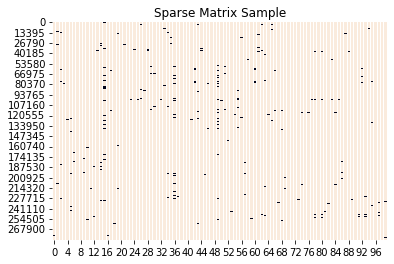

In [ ]:
sns.heatmap(X_train_tfidf.todense()[:,np.random.randint(0,X_train_tfidf.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

In [ ]:
#save model
dump(tfidf_vect, open('../app/bso_publis_scopus/06_models/tfidf_vect.pkl', 'wb'))

## Modèles & prédictions

In [ ]:
from sklearn import pipeline
##models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
##pour l'évaluation
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
##pour courbe ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
def print_confusion_matrix(model,textvec,y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f"CONFUSION MATRIX - {model} Classifier sur {textvec}\n", size=16)

def apply_model(model):
    entries = []
    classifier = model
    ## pipeline
    model_tfidf = pipeline.Pipeline([("vectorizer", tfidf),  
                           ("classifier", classifier)])
    model_count = pipeline.Pipeline([("vectorizer", count_vect),  
                           ("classifier", classifier)])
    ## train classifier tfidf
    model_tfidf["classifier"].fit(X_train_tfidf, y_train_miss.values.ravel())
    y_pred_tfidf = model_tfidf.predict(X_test["features_union"].values.astype('U'))
    accuracy_tfidf = metrics.accuracy_score(y_test,y_pred_tfidf)
    print(print_confusion_matrix(model,"tfidf",y_pred_tfidf))
    entries.append({"model_name" : model, "text_representation" : "tfidf", "accuracy" : accuracy_tfidf})
    ## train classifier countVect
    model_count["classifier"].fit(X_train_count, y_train_miss.values.ravel())
    y_pred_count = model_count.predict(X_test["features_union"].values.astype('U'))
    accuracy_count = metrics.accuracy_score(y_test,y_pred_count)
    print(print_confusion_matrix(model,"countVect",y_pred_count))
    entries.append({"model_name" : model, "text_representation" : "countVect", "accuracy" : accuracy_count})
    return entries


### Tests sur plusieurs modèles

None
None
None


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



None
None
None


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



None


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



None


,model_name,text_representation,accuracy
0,"(DecisionTreeClassifier(max_depth=5, max_featu...",tfidf,0.520645
1,"(DecisionTreeClassifier(max_depth=5, max_featu...",countVect,0.491992
0,LinearSVC(),tfidf,0.716119
1,LinearSVC(),countVect,0.719537
0,MultinomialNB(),tfidf,0.646578
1,MultinomialNB(),countVect,0.630484
0,"LogisticRegression(max_iter=200, multi_class='...",tfidf,0.717298
1,"LogisticRegression(max_iter=200, multi_class='...",countVect,0.720430


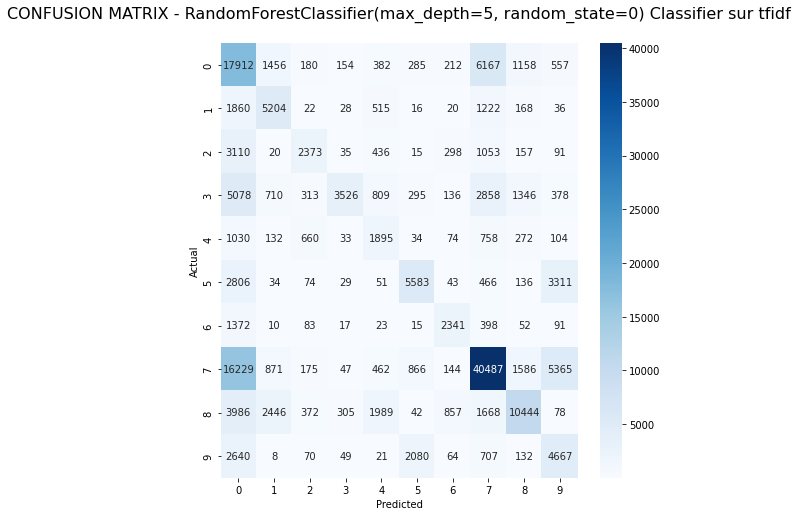

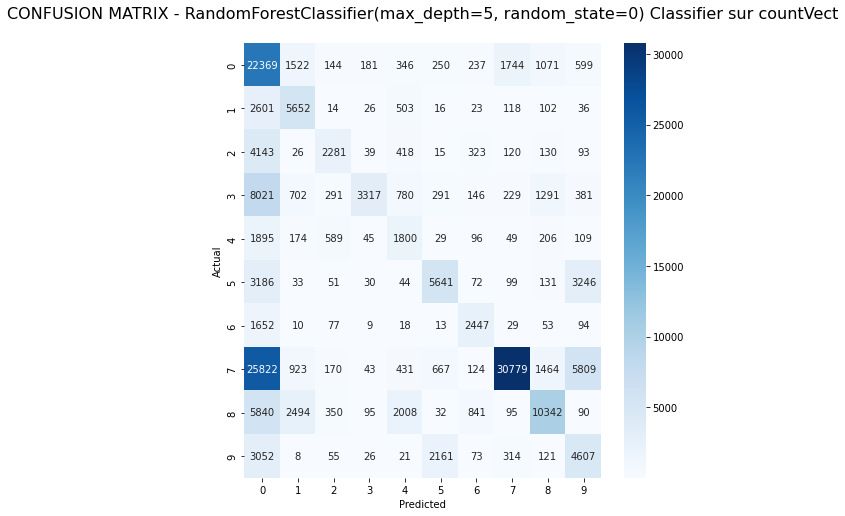

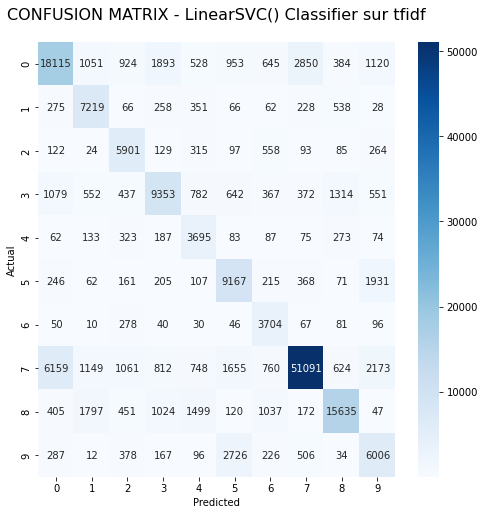

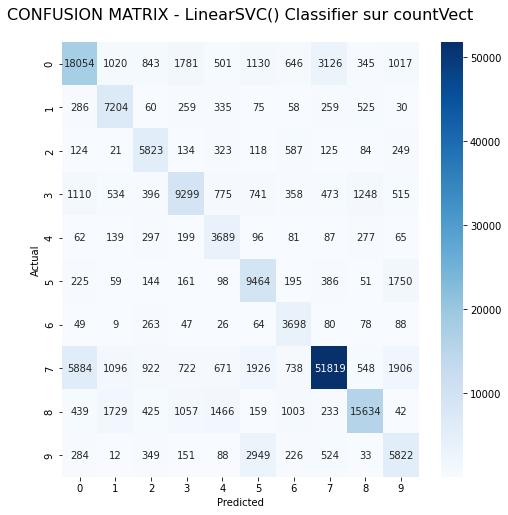

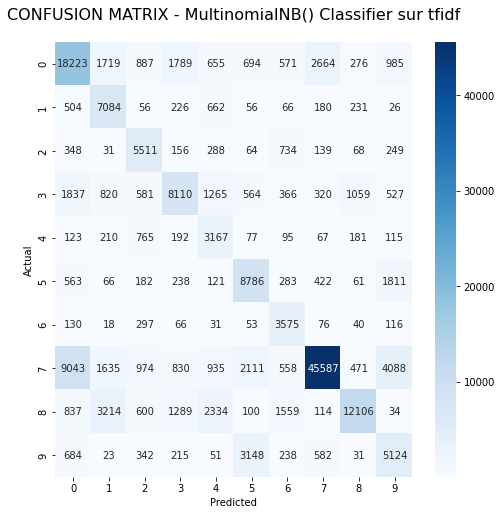

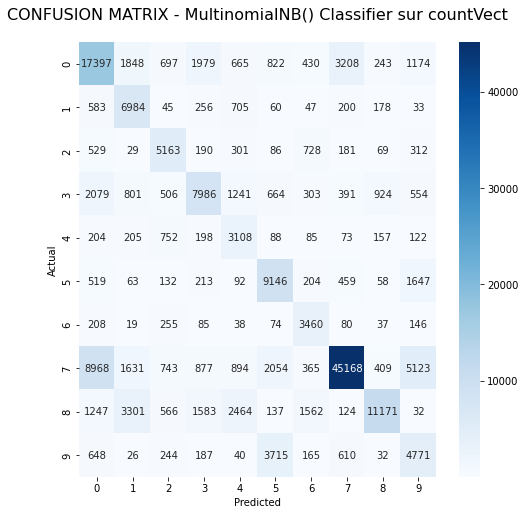

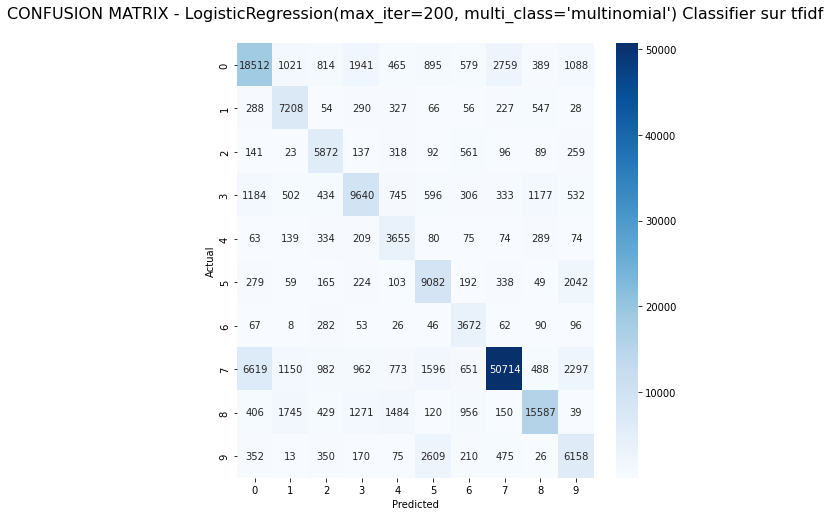

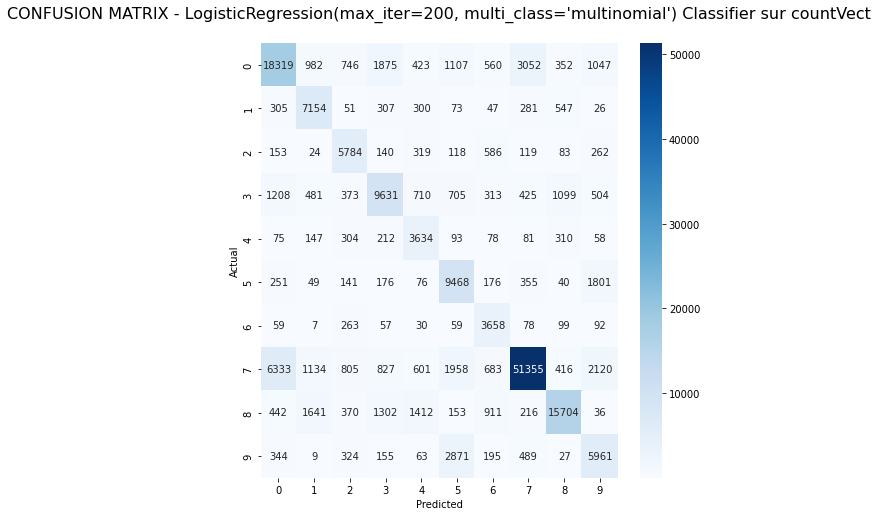

In [ ]:
df_result = pd.DataFrame(columns=['model_name', 'text_representation', 'accuracy'])
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=200),
]

for model in models:
    df_result = df_result.append(apply_model(model))
df_result

### Tuning des hyperparamètres sur LogisticRegression avec CountVectorizer (meilleur score)

#### Manuel

In [ ]:
logmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
logmodel.fit(X_train_count, y_train_miss.values.ravel())
X_test_count = count_vect.transform(X_test["features_union"].values.astype('U'))
y_pred = logmodel.predict(X_test_count)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65     28463
           1       0.62      0.79      0.69      9091
           2       0.63      0.76      0.69      7588
           3       0.66      0.62      0.64     15449
           4       0.48      0.73      0.58      4992
           5       0.57      0.76      0.65     12533
           6       0.51      0.83      0.63      4402
           7       0.91      0.78      0.84     66232
           8       0.84      0.71      0.77     22187
           9       0.50      0.57      0.53     10438

    accuracy                           0.72    181375
   macro avg       0.64      0.72      0.67    181375
weighted avg       0.75      0.72      0.73    181375



In [ ]:
logmodel_newton = LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter=1000)
logmodel_newton.fit(X_train_count, y_train_miss.values.ravel())
X_test_count = count_vect.transform(X_test["features_union"].values.astype('U'))
y_pred = logmodel_newton.predict(X_test_count)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65     28463
           1       0.62      0.79      0.69      9091
           2       0.63      0.76      0.69      7588
           3       0.66      0.62      0.64     15449
           4       0.48      0.73      0.58      4992
           5       0.57      0.76      0.65     12533
           6       0.51      0.83      0.63      4402
           7       0.91      0.78      0.84     66232
           8       0.84      0.71      0.77     22187
           9       0.50      0.57      0.53     10438

    accuracy                           0.72    181375
   macro avg       0.64      0.72      0.67    181375
weighted avg       0.75      0.72      0.73    181375



In [ ]:
logmodel_saga = LogisticRegression(multi_class='multinomial', solver='saga',max_iter=1000)
logmodel_saga.fit(X_train_count, y_train_miss.values.ravel())
X_test_count = count_vect.transform(X_test["features_union"].values.astype('U'))
y_pred = logmodel_saga.predict(X_test_count)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65     28463
           1       0.62      0.79      0.69      9091
           2       0.63      0.76      0.69      7588
           3       0.66      0.62      0.64     15449
           4       0.48      0.73      0.58      4992
           5       0.57      0.76      0.65     12533
           6       0.51      0.83      0.63      4402
           7       0.91      0.78      0.84     66232
           8       0.84      0.71      0.77     22187
           9       0.50      0.57      0.53     10438

    accuracy                           0.72    181375
   macro avg       0.64      0.72      0.67    181375
weighted avg       0.75      0.72      0.73    181375



#### [Unused] Avec GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
import time

In [ ]:
penalty = ["l1","l2"]
max_iter = [200, 300, 400]
C = np.linspace(0.1, 1.0, num=5)
solver = ["lbfgs", "newton-cg", "saga"]

param_grid = dict(max_iter=max_iter, C=C, penalty=penalty)

In [ ]:
logmodel = LogisticRegression(multi_class='multinomial', solver="lbfgs")

grid = GridSearchCV(estimator=logmodel, param_grid=param_grid, cv = 5)

start_time = time.time()
grid_result = grid.fit(X_train_count, y_train_miss.values.ravel())
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

### Usage

In [ ]:

input = count_vect.transform(["law norm experimental evidence liability rule"])
predicted_example = logmodel.predict(input)
predicted_example

array([5])

In [ ]:
df_bso_ready[df_bso_ready["bso_classe_encoded"] == predicted_example[0]]["bso_classification"].head(1)

80    Humanities
Name: bso_classification, dtype: object

### Sauvegarde du modèle

In [ ]:
# sauvegarde du model
dump(logmodel, open('../app/bso_publis_scopus/06_models/logmodel.pkl', 'wb'))

In [ ]:
# ou avec joblib (plus rapide)
import joblib
from joblib import dump, load

dump(logmodel, '../app/bso_publis_scopus/06_models/logmodel.joblib')
# Usage :
# #logmodel = load('../app/bso_publis_scopus/06_models/models/logmodel.joblib')

## Docs, références

https://www.analyticsvidhya.com/blog/2021/11/introduction-to-automated-multi-class-text-classification/

https://www.kaggle.com/code/selener/multi-class-text-classification-tfidf/notebook